In [1]:
import math

#import Qiskit
from qiskit import Aer ,IBMQ
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,execute

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram



In [2]:
IBMQ.save_account('ae3eea413b98f53a07979e58a63c61020eec0e5de949c370ac79fa791d98156e501e3aa29ab16b64e4207aade400753052d2180597599117f286a726175bc899')
IBMQ.load_account()

configrc.store_credentials:WARNING:2020-08-07 11:39:13,778: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
#First let's define the QFT function, as well as a function that creates a state from which a QFT will return 001:
def input_state(circ,q,n):
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(q[j])
        circ.u1(-math.pi/float(2**(j)),q[j])

In [4]:
def qft(circ,q,n):
    """n-qbit QFT on q in circ."""
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(math.pi/float(2**(k-j)),q[k],q[j])
        circ.barrier()
     

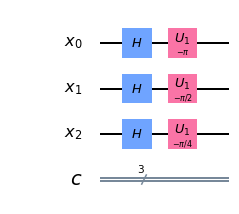

In [5]:
#Implement a QFT on a prepared three qubit input state that should return  001:
q=QuantumRegister(3,'x')
c=ClassicalRegister(3,'c')
qft3=QuantumCircuit(q,c)

#prepere the test and. draw circuit
input_state(qft3,q,3)

qft3.draw(output='mpl')

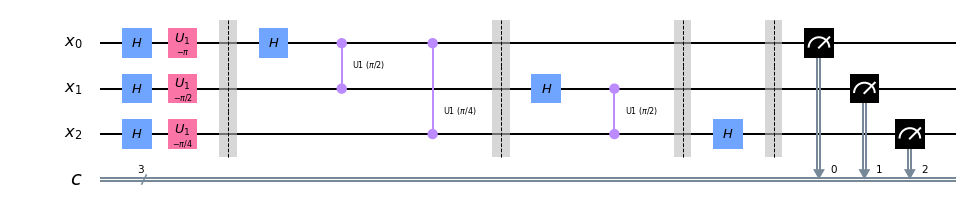

In [6]:
qft3.barrier()
#do qft and measure 
qft(qft3,q,3)
for i in range(3):
    qft3.measure(q[i],c[i])

qft3.draw(output='mpl')

In [7]:
# run on local simulator
backend=Aer.get_backend("qasm_simulator")
simulate=execute(qft3,backend=backend,shots=1024).result()
simulate.get_counts()

{'001': 1024}

In [10]:
#real device
provider=IBMQ.get_provider(hub='ibm-q')
backend=provider.get_backend(' ')
shots=3000
job_exp=execute(qft3,backend,shots=shots)
job_monitor(job_exp)

QiskitBackendNotFoundError: 'No backend matches the criteria'

In [ ]:
results=job_exp.result()
plot_histogram(result.get_counts())